In [18]:
# https://www.kaggle.com/tmdb/tmdb-movie-metadata
!wget https://lazyprogrammer.me/course_files/nlp/tmdb_5000_movies.csv
#Importing Data to the lib

--2025-02-09 10:24:02--  https://lazyprogrammer.me/course_files/nlp/tmdb_5000_movies.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5698602 (5.4M) [text/csv]
Saving to: ‘tmdb_5000_movies.csv.1’

tmdb_5000_movies.cs 100%[===================>]   5.43M  --.-KB/s    in 0.08s   

2025-02-09 10:24:02 (64.8 MB/s) - ‘tmdb_5000_movies.csv.1’ saved [5698602/5698602]



In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity,euclidean_distances
#This import function is used to get the simalarity between the components like the cosine simlarity and the euclidean_distance

In [20]:
df=pd.read_csv('tmdb_5000_movies.csv')

In [21]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [22]:
x=df.iloc[0]
x
#This is used to get the details of the first row and corresponding to all its columns


,0
budget,237000000
genres,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
homepage,http://www.avatarmovie.com/
id,19995
keywords,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":..."
original_language,en
original_title,Avatar
overview,"In the 22nd century, a paraplegic Marine is di..."
popularity,150.437577
production_companies,"[{""name"": ""Ingenious Film Partners"", ""id"": 289..."


In [23]:
x['genres']
#Columnns used to build out the functions
#to get all the generes of Avatar
#these are actually in the json format so we dont actually need the id and also we need to remove spaces in between the geners and combine them together

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [24]:
x['keywords']
#specific keywords to help get the opitimize words
#similar to the action but in jere we got more detials of the synoposis of the story and also
#Here we used lot more of detials like culture clash

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [25]:
j=json.loads(x['genres'])
j

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [26]:
j=json.loads(x['genres'])
' '.join(''.join(jj['name'].split()) for jj in j)
#Convert the json to a single line of text as this is how the tf-idf asks
#To get the geners loading into a list as we need to convert this strings into list
#This makes the genre data usable for machine learning models (like TF-IDF for recommendation systems).

'Action Adventure Fantasy ScienceFiction'

In [27]:
#Convert by the Revant Data for each movie into a single String
#To be ingested by TFidfVectorizer
def genres_and_keywords_to_string(row):
  genres=json.loads(row['genres'])
  genres=' '.join(' '.join(j['name'].split()) for j in genres)

  keywords=json.loads(row['keywords'])
  keywords=' '.join(''.join(j['name'].split())for j in keywords)
  return "%s %s" % (genres,keywords)

# we wrote the function using the function name we called json loads and then joined everything together with a single space
#we joined generes and keywords together

In [28]:
# create a new string representation of each movie
df['string'] = df.apply(genres_and_keywords_to_string, axis=1)

In [29]:
df['string']

,string
0,Action Adventure Fantasy Science Fiction cultu...
1,Adventure Fantasy Action ocean drugabuse exoti...
2,Action Adventure Crime spy basedonnovel secret...
3,Action Crime Drama Thriller dccomics crimefigh...
4,Action Adventure Science Fiction basedonnovel ...
...,...
4798,Action Crime Thriller unitedstates–mexicobarri...
4799,Comedy Romance
4800,Comedy Drama Romance TV Movie date loveatfirst...
4801,


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=2000)
X=tfidf.fit_transform(df['string'])
X

<4803x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 37814 stored elements in Compressed Sparse Row format>

In [31]:
#4803 these are the number of documents and 2000 corresponding words for each of them using the max_features
#There are 37,814 non-zero values in the matrix.

In [32]:
movie2idx = pd.Series(df.index, index=df['title'])
movie2idx
#We are working with matrix of numbers so we create a map very simply
#In simple terms, we are creating a mapping of movie titles to unique IDs (indices), where each movie title is associated with a specific index or position in the DataFrame.

,0
title,
Avatar,0
Pirates of the Caribbean: At World's End,1
Spectre,2
The Dark Knight Rises,3
John Carter,4
...,...
El Mariachi,4798
Newlyweds,4799
"Signed, Sealed, Delivered",4800


In [33]:
idx = movie2idx['Scream 3']
idx

1164

In [34]:
query = X[idx]
query

<1x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [35]:
query.toarray()


array([[0., 0., 0., ..., 0., 0., 0.]])

In [36]:
# compute similarity between query and every vector in X
scores = cosine_similarity(query, X)
scores
#calculating the similarity between the the movie in the Query and other movies in the X the whole dataset

array([[0., 0., 0., ..., 0., 0., 0.]])

In [37]:
# currently the array is 1 x N, make it just a 1-D array
scores = scores.flatten()

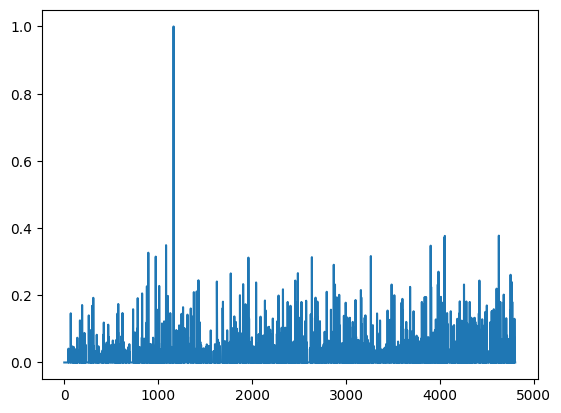

In [38]:
plt.plot(scores)

In [39]:
(-scores).argsort()

array([1164, 4628, 4053, ..., 1714, 1720, 4802])

In [40]:
# Let's say you have these scores (cosine similarities)
scores = cosine_similarity(query, X)[0]

# Sorting the scores in descending order (most similar first)
sorted_indices = (-scores).argsort()

# Get the top N indices (for example top 5)
top_indices = sorted_indices[:5]

# Now, we can get the actual similarity scores of the most similar movies
top_scores = scores[top_indices]

# Print out the indices and their corresponding similarity scores
for idx, score in zip(top_indices, top_scores):
    print(f"Movie Index: {idx}, Cosine Similarity Score: {score}")



Movie Index: 1164, Cosine Similarity Score: 1.0000000000000002
Movie Index: 4628, Cosine Similarity Score: 0.37747224094037757
Movie Index: 4053, Cosine Similarity Score: 0.3767574652286655
Movie Index: 4048, Cosine Similarity Score: 0.3716620979149615
Movie Index: 1084, Cosine Similarity Score: 0.3491068030953936


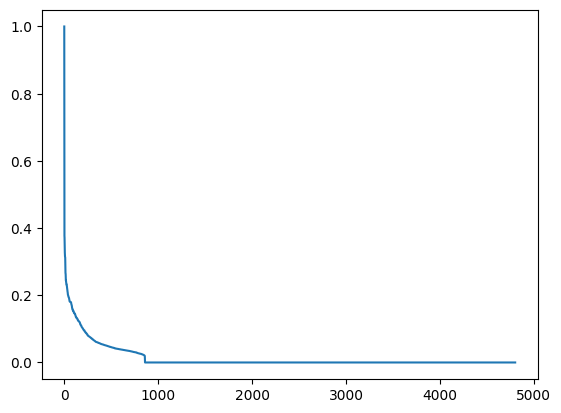

In [41]:
plt.plot(scores[(-scores).argsort()]);

In [42]:
# get top 5 matches
# exclude self (similarity between query and itself yields max score)
recommended_idx = (-scores).argsort()[1:6]

In [43]:
# convert indices back to titles
df['title'].iloc[recommended_idx]

,title
4628,Graduation Day
4053,Friday the 13th: A New Beginning
4048,The Calling
1084,The Glimmer Man
3902,Friday the 13th Part VI: Jason Lives


In [44]:
# create a function that generates recommendations
def recommend(title):
  # get the row in the dataframe for this movie
  idx = movie2idx[title]
  if type(idx) == pd.Series:
    idx = idx.iloc[0]

  # calculate the pairwise similarities for this movie
  query = X[idx]
  scores = cosine_similarity(query, X)

  # currently the array is 1 x N, make it just a 1-D array
  scores = scores.flatten()

  # get the indexes of the highest scoring movies
  # get the first K recommendations
  # don't return itself!
  recommended_idx = (-scores).argsort()[1:6]

  # return the titles of the recommendations
  return df['title'].iloc[recommended_idx]

In [45]:
print("Recommendations for 'Scream 3':")
print(recommend('Scream 3'))

Recommendations for 'Scream 3':
4628                          Graduation Day
4053        Friday the 13th: A New Beginning
4048                             The Calling
1084                         The Glimmer Man
3902    Friday the 13th Part VI: Jason Lives
Name: title, dtype: object


In [46]:
print("Recommendations for 'Mortal Kombat':")
print(recommend('Mortal Kombat'))

Recommendations for 'Mortal Kombat':
1611              Mortal Kombat: Annihilation
1670                       DOA: Dead or Alive
3856              In the Name of the King III
1001    Street Fighter: The Legend of Chun-Li
2237                        Alone in the Dark
Name: title, dtype: object


In [47]:
print("Recommendations for 'Runaway Bride':")
print(recommend('Runaway Bride'))

Recommendations for 'Runaway Bride':
4115                    House of D
2325    My Big Fat Greek Wedding 2
2620                 Promised Land
4604         It Happened One Night
3313                  An Education
Name: title, dtype: object


In [49]:
print("The Dark Knight Rises:")
print(recommend('Runaway Bride'))

The Dark Knight Rises:
4115                    House of D
2325    My Big Fat Greek Wedding 2
2620                 Promised Land
4604         It Happened One Night
3313                  An Education
Name: title, dtype: object
